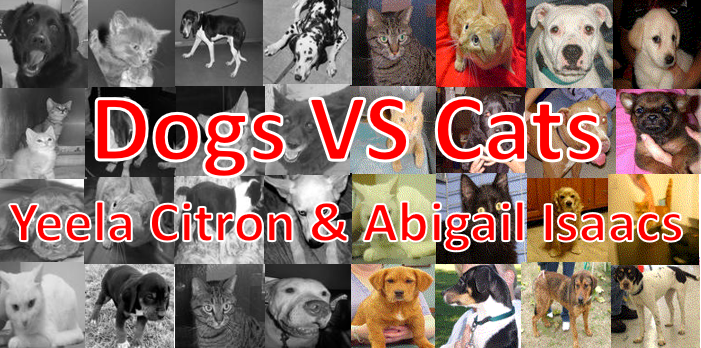

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
import random
from sklearn.dummy import DummyClassifier
import seaborn as sns
import os
import zipfile
from PIL import Image
import PIL
import glob
import matplotlib.image as img
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import time
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE 
import seaborn as sb
import matplotlib.patheffects as pe

In [16]:
train_path = r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train"

titles = os.listdir(train_path)

## resizing the photos and converting them to black and white using only 8 bit pixels 

#### Each pixel uses the full range of the bit depth. a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on.
#### we will convert our 3D tada to 2D by mapping the pixels to an 8-bit pixels using a black and white palette.

In [52]:
pixels =[]
for title in titles:
    file = os.path.join(url2,title)
    img = Image.open(file)
    resize = img.resize((100,100))
    bw = resize.convert(mode ='L')
    pixels.append([bw.getdata()])
    bw.save(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train_resize\\" + title)
    

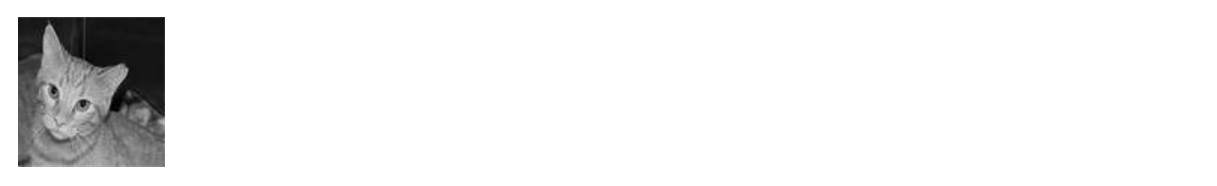

### Converting imges to png file

In [60]:
url = r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train"
titles = os.listdir(url)
for title in titles:
    im1 = Image.open(url+"\\"+title)
    im1.save(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train_color\\" + title + ".png")

In [9]:
url2 = r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train_color"
titles2 = os.listdir(url2)

## resizing the photos and converting them to a colored picturs using only 8 bit pixels 

#### Each pixel uses the full range of the bit depth. a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on.
#### we will convert our 3D tada to 2D by mapping the pixels to an 8-bit pixels using a color palette.

In [ ]:
pixels_color =[]
for title in titles2:
    file = os.path.join(url2,title)
    img = Image.open(file)
    resize = img.resize((100,100))
    bw = resize.convert(mode ='P')
    pixels_color.append([bw.getdata()])
    bw.save(r"C:\Users\abiis\OneDrive\שולחן העבודה\מדעי הנתונים\dogs-vs-cats\train\train_resize_color\\" + title)
    

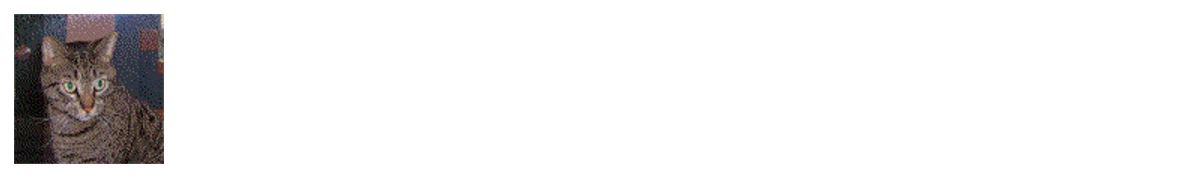

# B&W

### Laybeling the data and creating data frame

In [ ]:
categories=[]
for title in titles:
    title= title.split('.')[0]
    if title=='dog':
        categories.append(1) # dog = 1
    else:
        categories.append(0) # cat = 0


In [ ]:
train_df_BW = pd.DataFrame({
    
    'category':categories,
    'pixels' : pixels
})

In [137]:
train_df_BW_split = pd.DataFrame(train_df_BW['pixels'].tolist())

train_df_BW_split

,0
0,"(169, 173, 177, 182, 185, 188, 190, 194, 196, ..."
1,"(43, 43, 50, 47, 44, 39, 43, 42, 41, 53, 45, 3..."
2,"(34, 31, 44, 46, 45, 53, 56, 56, 54, 56, 51, 5..."
3,"(221, 223, 223, 227, 231, 227, 227, 231, 229, ..."
4,"(116, 119, 125, 96, 81, 93, 134, 131, 154, 181..."
...,...
24995,"(140, 142, 143, 145, 146, 147, 148, 149, 148, ..."
24996,"(97, 79, 99, 91, 87, 100, 81, 81, 95, 76, 73, ..."
24997,"(45, 43, 48, 59, 64, 51, 53, 52, 52, 44, 43, 4..."
24998,"(254, 251, 244, 234, 222, 205, 180, 143, 101, ..."


In [138]:
train_df_BW_split.rename({0:'pixels'}, axis=1, inplace=True)
train_df_BW_split.head()

,pixels
0,"(169, 173, 177, 182, 185, 188, 190, 194, 196, ..."
1,"(43, 43, 50, 47, 44, 39, 43, 42, 41, 53, 45, 3..."
2,"(34, 31, 44, 46, 45, 53, 56, 56, 54, 56, 51, 5..."
3,"(221, 223, 223, 227, 231, 227, 227, 231, 229, ..."
4,"(116, 119, 125, 96, 81, 93, 134, 131, 154, 181..."


In [139]:
for i in range (0,25000):
    train_df_BW_split['pixels'][i] = list(train_df_BW_split['pixels'][i])


train_df_BW_split = pd.DataFrame(train_df_BW_split['pixels'].tolist())

train_df_BW_split

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,169,173,177,182,185,188,190,194,196,198,...,3,3,3,2,2,2,2,2,2,2
1,43,43,50,47,44,39,43,42,41,53,...,44,51,55,56,54,68,74,68,35,36
2,34,31,44,46,45,53,56,56,54,56,...,155,163,150,134,134,146,158,169,170,154
3,221,223,223,227,231,227,227,231,229,227,...,229,212,204,204,205,215,222,216,211,213
4,116,119,125,96,81,93,134,131,154,181,...,92,96,97,93,101,118,95,91,95,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,164,165,166,166,167,168,168,168,168,169
24996,97,79,99,91,87,100,81,81,95,76,...,95,94,85,95,85,82,85,98,96,71
24997,45,43,48,59,64,51,53,52,52,44,...,126,145,124,97,112,132,159,107,129,164
24998,254,251,244,234,222,205,180,143,101,72,...,101,100,98,102,102,111,111,113,114,114


In [141]:
del train_df_BW['pixels']
train_df_BW

,category
0,0
1,0
2,0
3,0
4,0
...,...
24995,1
24996,1
24997,1
24998,1


In [142]:
train_df_BW_split = pd.concat([train_df_BW_split, train_df_BW], axis=1)

train_df_BW_split

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,category
0,169,173,177,182,185,188,190,194,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,43,50,47,44,39,43,42,41,53,...,51,55,56,54,68,74,68,35,36,0
2,34,31,44,46,45,53,56,56,54,56,...,163,150,134,134,146,158,169,170,154,0
3,221,223,223,227,231,227,227,231,229,227,...,212,204,204,205,215,222,216,211,213,0
4,116,119,125,96,81,93,134,131,154,181,...,96,97,93,101,118,95,91,95,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,97,79,99,91,87,100,81,81,95,76,...,94,85,95,85,82,85,98,96,71,1
24997,45,43,48,59,64,51,53,52,52,44,...,145,124,97,112,132,159,107,129,164,1
24998,254,251,244,234,222,205,180,143,101,72,...,100,98,102,102,111,111,113,114,114,1


### train test split

In [ ]:
X = train_df_BW_split.drop("category", axis=1)
y = train_df_BW
X_train_BW, X_test_BW, y_train_BW, y_test_BW = train_test_split(X, y,test_size=0.1, random_state=42)


# Models

## dummy model

In [33]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_BW, y_train_BW)
dummy_clf.score(X_test_BW, y_test_BW)

0.4808

### KNN

In [187]:
# search for an optimal value of K for KNN
kf = KFold(n_splits=10, random_state=2, shuffle=True)

k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_BW, y_train_BW, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5488000000000001, 0.5386222222222223, 0.5622222222222222, 0.5520444444444443, 0.5710222222222223, 0.5626222222222222, 0.5757777777777778, 0.5649333333333334, 0.5777333333333333, 0.5733777777777778, 0.5840444444444444, 0.5771111111111111, 0.5876444444444445, 0.5801333333333333, 0.5888444444444445, 0.5840444444444446, 0.5913333333333334, 0.5875111111111111, 0.5934222222222222, 0.5889333333333333, 0.5931555555555555, 0.5892, 0.5930666666666667, 0.5898666666666668, 0.5968, 0.5932888888888889, 0.5965777777777779, 0.5962666666666666, 0.5982222222222223, 0.5963111111111111, 0.6017333333333333, 0.5990222222222223, 0.6034666666666666, 0.6005777777777777, 0.6023555555555556, 0.5990666666666666, 0.6031555555555556, 0.6004888888888888, 0.6044000000000002, 0.6029333333333333, 0.6051111111111112, 0.6026666666666667, 0.6050222222222222, 0.6019555555555555, 0.6052444444444445, 0.6026666666666667, 0.6053777777777778, 0.6038666666666667, 0.6058666666666666]


Text(0, 0.5, 'Cross-Validated Accuracy')

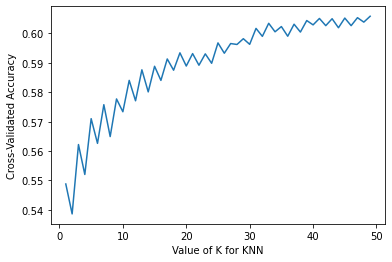

In [188]:
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [192]:
op_k = k_scores.index(max(k_scores))
score_knn = k_scores[op_k]
print ("our optimal k =" + str(op_k+1))
print ("Accuracy best score =" + str(score_knn))

our optimal k =49
Accuracy best score =0.6058666666666666


### Random Forest Classifier

In [30]:
start_time = time.time()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, X_train_BW, y_train_BW, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("Running time:" +(str)(end_time - start_time))

score:0.6372888888888889
Running time:713.8037493228912


### AdaBoost Classifier using Decision tree

In [52]:
ada_train_BW = pd.concat([X_train_BW, y_train_BW], axis=1)

In [ ]:
y = np.array(ada_train_BW.category)
X = ada_train_BW.drop("category", axis=1)
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y,test_size=0.05, random_state=1)

In [196]:
AdaModel = AdaBoostClassifier( n_estimators= 100,learning_rate=1)
AdaModel = AdaModel.fit(X_train_ada, y_train_ada)
score = AdaModel.score(X_test_ada, y_test_ada)
score

0.6231111111111111

### Voting Classifier

In [7]:
models = list()
models.append(('lr', LogisticRegression()))
models.append(('ds', DecisionTreeClassifier()))
models.append(('knn', KNeighborsClassifier(n_neighbors=4)))
models.append(('rf', RandomForestClassifier()))
models

[('lr', LogisticRegression()),
 ('ds', DecisionTreeClassifier()),
 ('knn', KNeighborsClassifier(n_neighbors=4)),
 ('rf', RandomForestClassifier())]

In [8]:
kf = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)

In [9]:
soft_Voting = VotingClassifier(estimators = models,voting ="soft")
hard_Voting = VotingClassifier(estimators = models,voting ="hard")

### Soft Voting

In [201]:
scores = model_selection.cross_val_score(soft_Voting, X_train_BW, y_train_BW, cv=kf, scoring='accuracy')
print(scores.mean())

0.5848


# <font color='Orange'> Color models </font>

### <font color='Orange'> Creating the data frame </font>

In [ ]:
categories2=[]
for title in titles2:
    title= title.split('.')[0]
    if title=='dog':
        categories2.append(1) # dog = 1
    else:
        categories2.append(0) # cat = 0

        
train_df_color = pd.DataFrame({
    
    'category':categories2,
    'pixels_color' : pixels_color
})

In [129]:
train_df_color.head()


,category,pixels_color
0,0,"[(104, 104, 104, 111, 104, 111, 110, 111, 111,..."
1,0,"[(53, 53, 53, 53, 53, 52, 53, 53, 52, 53, 53, ..."
2,0,"[(52, 47, 53, 53, 53, 53, 53, 53, 53, 53, 53, ..."
3,0,"[(182, 189, 218, 189, 218, 189, 218, 189, 218,..."
4,0,"[(61, 97, 67, 60, 54, 60, 103, 61, 104, 146, 6..."


In [ ]:
train_df_color_split = pd.DataFrame(train_df_color['pixels_color'].tolist())

train_df_color_split

In [ ]:
train_df_color_split.rename({0:'pixels'}, axis=1, inplace=True)
train_df_color_split.head()

In [ ]:
for i in range (0,25000):
    train_df_color_split['pixels'][i] = list(train_df_color_split['pixels'][i])


train_df_color_split = pd.DataFrame(train_df_color_split['pixels'].tolist())

train_df_color_split

In [ ]:
del train_df_color['pixels_color']

In [ ]:
train_df_color_split = pd.concat([train_df_color_split, train_df_color], axis=1)


###  <font color='Orange'>Train test split </font>



In [ ]:
X = train_df_color_split.drop("category", axis=1)
y = train_df_color
X_train_color, X_test_color, y_train_color, y_test_color = train_test_split(X, y,test_size=0.1, random_state=42)



##  <font color='Orange'>Color models</font>


##  <font color='Orange'>dummy model</font>

In [154]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_color, y_train_color)
dummy_clf.score(X_test_color, y_test_color)

0.4808

## <font color='Orange'> KNN </font>

In [171]:
# search for an optimal value of K for KNN
kf = KFold(n_splits=10, random_state=2, shuffle=True)

k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_color, y_train_color, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5498222222222222, 0.5394222222222222, 0.5615555555555555, 0.5549333333333333, 0.5732, 0.5658666666666667, 0.5805777777777777, 0.5746666666666667, 0.5860000000000001, 0.5812, 0.591911111111111, 0.5860444444444444, 0.5937777777777777, 0.5916888888888889, 0.6007111111111112, 0.5966666666666666, 0.602311111111111, 0.5970222222222222, 0.5999999999999999, 0.5991555555555556, 0.6035999999999999, 0.6012888888888889, 0.6041333333333334, 0.6033333333333333, 0.6054666666666668, 0.6057777777777777, 0.6058222222222222, 0.6084888888888889, 0.6074222222222222, 0.6072, 0.6096888888888888, 0.6086666666666668, 0.6079111111111111, 0.6078222222222223, 0.6083111111111111, 0.607288888888889, 0.6095111111111111, 0.6099111111111111, 0.6099555555555556, 0.6102666666666667, 0.6121333333333333, 0.611688888888889, 0.6105333333333334, 0.6102666666666666, 0.6089777777777778, 0.6108888888888889, 0.6093777777777778, 0.6105333333333334, 0.6101777777777777]


Text(0, 0.5, 'Cross-Validated Accuracy')

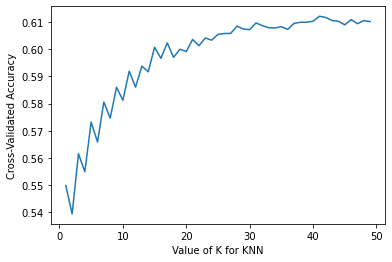

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [177]:
op_k = k_scores.index(max(k_scores))+1
score_knn = k_scores[op_k]
print ("our optimal k =" + str(op_k))
print ("Accuracy best score =" + str(score_knn))

our optimal k =41
Accuracy best score =0.611688888888889


### <font color='Orange'> Random Forest Classifier </font>

In [179]:

RFR = RandomForestClassifier()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, X_train_color, y_train_color, cv=kf)

print("score:" +(str)(scores_standardized.mean()))


score:0.6389777777777778


### <font color='Orange'> AdaBoost Classifier </font>

In [ ]:
ada_train = pd.concat([X_train_color, y_train_color], axis=1)


In [ ]:
y = np.array(ada_train.category)
X = ada_train.drop("category", axis=1)
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y,test_size=0.05, random_state=1)

In [186]:
AdaModel = AdaBoostClassifier( n_estimators= 100,learning_rate=1)
AdaModel = AdaModel.fit(X_train_ada, y_train_ada)
score = AdaModel.score(X_test_ada, y_test_ada)
score

0.6115555555555555

##  <font color='orange'> Voting Classifier </font>

In [ ]:
models = list()
models.append(('lr', LogisticRegression()))
models.append(('ds', DecisionTreeClassifier()))
models.append(('knn', KNeighborsClassifier(n_neighbors=4)))
models.append(('rf', RandomForestClassifier()))

###  <font color='orange'> Soft Voting </font>

In [ ]:
kf = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)
soft_Voting = VotingClassifier(estimators = models,voting ="soft")

In [42]:
scores = model_selection.cross_val_score(soft_Voting, X_train_color, y_train_color, cv=kf, scoring='accuracy')
print(scores.mean())

0.5881333333333333


#  <font color='red'> Compering scores black & white and colored tables </font>

In [6]:
data  = {' ' :['BW','COLOR'],
         'Dummy':[0.48, 0.48],
         'KNN': [0.605, 0.611],
         'Random Forest':[0.637,0.638],
         'AbaBoost DT':[0.623,0.611],
         'Soft Voting':[0.584,0.528],
         }

data = pd.DataFrame(data) 
final_scores = data.set_index(' ')
final_scores

,Dummy,KNN,Random Forest,AbaBoost DT,Soft Voting
,,,,,
BW,0.48,0.605,0.637,0.623,0.584
COLOR,0.48,0.611,0.638,0.611,0.528


#### It can be seen from the table that there is no significant difference between the black-and-white and the colored images
#### It can be concluded that both probably have a "full utilization" of the 256 bits
## Therefore we will continue with the black&white table

##   <font color='red'> Naive bayes classifier </font>

In [43]:
from sklearn.naive_bayes import GaussianNB

In [48]:
model = GaussianNB()
model = model.fit(X_train_ada, y_train_ada)
score = model.score(X_test_ada, y_test_ada)
score

0.5866666666666667

### We saw that our models have long running times so we will try to remove some features

##   <font color='red'> Pixel importances </font>

Elapsed time to compute the importances: 0.043 seconds


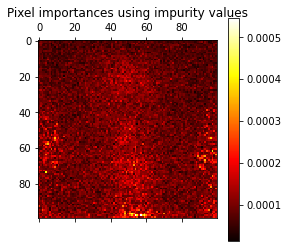

In [26]:
RFR.fit(X_train_BW, y_train_BW)
n_jobs = -1

data = train_df_BW_finale
X, y = X_train_BW, y_train_BW


start_time = time.time()
img_shape = (100,100)

importances = RFR.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

##   <font color='red'> Feature selection </font>

#### Although we cut the pictures we still have a lot of features in our data, so we will use feature selection to reduce our data frame so that the model will run smoothly and without background noise. Let start by removing half or the columns:

In [19]:
X.shape

(22500, 10000)

In [22]:
X_new = SelectKBest(chi2, k=5000).fit_transform(X, y)
X_new.shape

(25000, 5000)

In [23]:
y = train_df_BW_finale["category"]
X_new = train_df_BW_finale.drop("category", axis=1)

X_train_BW_5000, X_test_BW_5000, y_train_BW_5000, y_test_BW_5000 = train_test_split(X_new, y,test_size=0.1, random_state=42)

In [24]:
start_time = time.time()
RFR = RandomForestClassifier()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, X_train_BW_5000, y_train_BW_5000, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("Running time:" +(str)(end_time - start_time))

score:0.6403555555555556
Running time:691.72323179245


#### As we can see removing half of the columns didn't change the model score, so let's try removing even more coloums:

In [25]:
X_new2 = SelectKBest(chi2, k=2500).fit_transform(X, y)
X_new2.shape

(25000, 2500)

In [26]:
y = train_df_BW_finale["category"]
X_new2 = train_df_BW_finale.drop("category", axis=1)

X_train_BW_2500, X_test_BW_2500, y_train_BW_2500, y_test_BW_2500 = train_test_split(X_new2, y,test_size=0.1, random_state=42)

In [27]:
start_time = time.time()
RFR = RandomForestClassifier()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, X_train_BW_2500, y_train_BW_2500, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("Running time:" +(str)(end_time - start_time))

score:0.6398666666666666
Running time:696.9058394432068


#### Wow we've got an Improvement let's try one more time to remove columns:


In [31]:
X_new3 = SelectKBest(chi2, k=1000).fit_transform(X, y)
X_new3.shape

(25000, 1000)

In [32]:
y = train_df_BW_finale["category"]
X_new3 = train_df_BW_finale.drop("category", axis=1)

X_train_BW_1000, X_test_BW_1000, y_train_BW_1000, y_test_BW_1000 = train_test_split(X_new3, y,test_size=0.1, random_state=42)

In [33]:
start_time = time.time()
RFR = RandomForestClassifier()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, X_train_BW_1000, y_train_BW_1000, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("Running time:" +(str)(end_time - start_time))

score:0.6412888888888889
Running time:693.4675645828247


In [35]:
data  = {'Number of Feature' :['Score','Time'],
         '10000':[0.637, 713],
         '5000': [0.64, 691],
         '2500':[0.639, 696],
         '1000':[0.641, 693]
         }

data = pd.DataFrame(data) 
final_scores = data.set_index('Number of Feature')
final_scores

,10000,5000,2500,1000
Number of Feature,,,,
Score,0.637,0.64,0.639,0.641
Time,713.000,691.00,696.000,693.000


### Surprisingly, there is no significant difference between the running times or the scores, we can try to explain this by a number of resons but we do not have a concrete explanation for it.
### We will continue to test the following models with the data set of 1000 features Since there is no significant difference in the scores and it is possible that on other models the running times will be better.


##   <font color='red'> KMeans using Logistic Regression K=100 </font>

In [9]:
ada_train_BW = pd.concat([X_train_BW_1000, y_train_BW_1000], axis=1)

In [10]:
y = np.array(ada_train_BW.category)
X = ada_train_BW.drop("category", axis=1)
X_train_1000, X_test_1000, y_train_1000, y_test_1000 = train_test_split(X, y,test_size=0.05, random_state=1)

In [10]:
pipe  = Pipeline([
    ("KMeans",KMeans(n_clusters = 100)),
("lg",LogisticRegression())])

In [11]:
pipe.fit(X_train_1000, y_train_1000)

Pipeline(steps=[("KMeans",KMeans(n_clusters = 100)), ("lg",LogisticRegression())])
score = pipe.score(X_test_1000, y_test_1000)
score

0.6053333333333333

##  <font color='red'> KMeans using Logistic Regression K=500 </font>

In [11]:
pipe  = Pipeline([
    ("KMeans",KMeans(n_clusters = 500)),
("lg",LogisticRegression())])

In [12]:
pipe.fit(X_train_1000, y_train_1000)

Pipeline(steps=[("KMeans",KMeans(n_clusters = 500)), ("lg",LogisticRegression())])
score = pipe.score(X_test_1000, y_test_1000)
score

0.6035555555555555

##  <font color='red'> T-SNE </font>

In [ ]:
X = np.vstack([X_train_BW[y_train_BW==i] for i in range(2)]) 
Y = np.hstack([y_train_BW[y_train_BW==i] for i in range(2)])

In [23]:
digits_final = TSNE(perplexity=30).fit_transform(X)


In [32]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("tab10", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=5, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
     
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
       
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=1, foreground="w"), pe.Normal()])
        txts.append(txt)
   
    return f, ax, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.13375853, -0.35177886, '0'), Text(-3.2170472, -0.6731657, '1')])

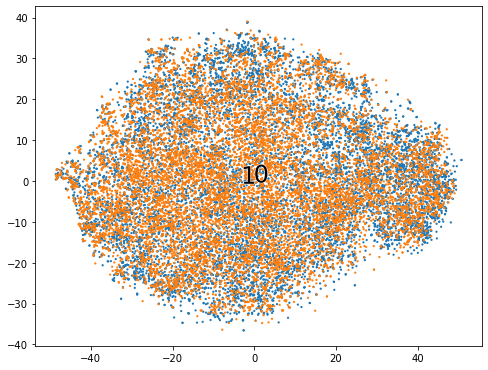

In [33]:
plot(digits_final,Y)

##  <font color='blue'> CAT = 0 </font>
##  <font color='darkorange'> DOG = 1 </font>

### We can learn from the graph that the data is very messy and cumbersome. It can explane why the models gives low scores.

#  <font color='red'> Table of scores </font>

In [36]:
data  = {' ' :['BW'],
         'Dummy':[0.48],
         'KNN': [0.605],
         'Random Forest':[0.64],
         'AbaBoost DT':[0.623],
         'Soft Voting':[0.584],
         'Naive bayes':[0.586],
         'KMeans LR K=100':[0.605],
         'KMeans LR K=500':[0.603]
         }

data = pd.DataFrame(data) 
final_scores = data.set_index(' ')
final_scores

,Dummy,KNN,Random Forest,AbaBoost DT,Soft Voting,Naive bayes,KMeans LR K=100,KMeans LR K=500
,,,,,,,,
BW,0.48,0.605,0.64,0.623,0.584,0.586,0.605,0.603


#  <font color='red'> Testing our best models -  </font>

### Random Forest 5000 features - 

In [37]:
RFR = RandomForestClassifier()
model = RFR.fit(X_train_BW_5000, y_train_BW_5000)
score = model.score(X_test_BW_5000, y_test_BW_5000)
print("score:" +(str)(score))

score:0.6336


### AdaBoost Classifier using Decision tree 5000 features -

In [39]:
AdaModel = AdaBoostClassifier( n_estimators= 100,learning_rate=1)
AdaModel = AdaModel.fit(X_train_BW_5000, y_train_BW_5000)
score = AdaModel.score(X_test_BW_5000, y_test_BW_5000)
print("score:" +(str)(score))

score:0.5788


#  <font color='red'>   Summary  -  </font>

We learned in class about a special feature of models based on Ensemble Learning - they prevent over-fitting.
In this project we can see a good example of this - in the Random Forest model, since the score on the test set is similar to the score on the train set.

Despite the excellent models the scores we received are not very high and we are waiting for the second year of university to study and work with CNN and neural networks.